## Cheatsheet for using df[], loc[] and iloc[] to select data, subsets and groupby

In [201]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

### Practicing creating a DataFrame for the first few Formula 1 races of the season (Top 5 Drivers)

In [69]:
# creating Series for the first few races of the season. Top 5 and points awarded

result_Aus = Series([26,18,15,12,10], index=['BOT','HAM','VER','VET','LEC'])
result_Bah = Series([25,18,16,12,10], index=['HAM','BOT','LEC','VER','VET'])
result_Bah

HAM    25
BOT    18
LEC    16
VER    12
VET    10
dtype: int64

In [70]:
# converting to dictionary

result_Aus_dict = result_Aus.to_dict()
result_Aus_dict                     

{'BOT': 26, 'HAM': 18, 'VER': 15, 'VET': 12, 'LEC': 10}

In [71]:
# can convert back again using =Series(result_Aus_dict)

result_Aus = Series(result_Aus_dict)

In [72]:
# Creating DataFrame from Series (Australia Results)

df = pd.DataFrame(result_Aus, columns=['Australia'])
df

,Australia
BOT,26
HAM,18
VER,15
VET,12
LEC,10


In [73]:
# Adding new column (Bahrain results Series)

df['Bahrain'] = result_Bah
df

,Australia,Bahrain
BOT,26,18
HAM,18,25
VER,15,12
VET,12,10
LEC,10,16


In [74]:
# Adding in data for the next 3 races

result_Chi = Series([25,18,15,12,10], index=['HAM','BOT','VET','VER','LEC'])
result_Aze = Series([25,18,15,12,11], index=['BOT','HAM','VET','VER','LEC'])
result_Spa = Series([26,18,15,12,10], index=['HAM','BOT','VER','VET','LEC'])
df['China'] = result_Chi
df['Azerbaijan'] = result_Aze
df['Spain'] = result_Spa
df                  

,Australia,Bahrain,China,Azerbaijan,Spain
BOT,26,18,18,25,18
HAM,18,25,25,18,26
VER,15,12,12,12,15
VET,12,10,15,15,12
LEC,10,16,10,11,10


In [75]:
# Adding the result for Monaco where LeClerc didn't score

result_Mon = Series([25,18,15,12], index=['HAM','VET','BOT','VER'])
df['Monaco'] = result_Mon
df 

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco
BOT,26,18,18,25,18,15.0
HAM,18,25,25,18,26,25.0
VER,15,12,12,12,15,12.0
VET,12,10,15,15,12,18.0
LEC,10,16,10,11,10,NaN


In [76]:
# Adding results for the next two races together and creating a new dataframe with them

results_next2 = {'Canada': Series([25,18,15,13,10], index=['HAM','VET','LEC','BOT','VER']),
                'France': Series([25,18,15,12,11], index=['HAM','BOT','LEC','VER','VET'])}
df_next2 = pd.DataFrame(results_next2)
df_next2

,Canada,France
BOT,13,18
HAM,25,25
LEC,15,15
VER,10,12
VET,18,11


In [77]:
# Joining to two DataFrames together 

df = pd.concat([df,df_next2], axis=1, sort=True)

# Dataset for the top 5 drivers in the first 8 races of the Formula 1 2019 season:

df

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
HAM,18,25,25,18,26,25.0,25,25
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


## Adding a row

easiest way is to create a new DataFrame and then append to the original. Beware of indexes and number of columns (NaN's)

In [183]:
# original DataFrame

df

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
HAM,18,25,25,18,26,25.0,25,25
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [188]:
# New DataFrame (Magnussen finished 6th is Aus then never reached 6th or higher in the next 7 races...)

df2 = pd.DataFrame(data=[8], index=['MAG'], columns=['Australia'])
df2

,Australia
MAG,8


In [190]:
df3 = df.append(df2, sort=True)
df3

,Australia,Azerbaijan,Bahrain,Canada,China,France,Monaco,Spain
BOT,26,25.0,18.0,13.0,18.0,18.0,15.0,18.0
HAM,18,18.0,25.0,25.0,25.0,25.0,25.0,26.0
LEC,10,11.0,16.0,15.0,10.0,15.0,NaN,10.0
VER,15,12.0,12.0,10.0,12.0,12.0,12.0,15.0
VET,12,15.0,10.0,18.0,15.0,11.0,18.0,12.0
MAG,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Manipulating and Selecting Data from a DataFrame

In [78]:
# Selecting a single column of data (note this prints a Series. Could turn into df with [])

df['China']

BOT    18
HAM    25
LEC    10
VER    12
VET    15
Name: China, dtype: int64

In [80]:
#Selecting multiple columns (note the double []). Column order doesn't matter

df[['China','Spain']]

,China,Spain
BOT,18,18
HAM,25,26
LEC,10,10
VER,12,15
VET,15,12


Summary of just the indexing operator:

    Its primary purpose is to select columns by the column names

    Select a single column as a Series by passing the column name directly to it: df['col_name']

    Select multiple columns as a DataFrame by passing a list to it: df[['col_name1', 'col_name2']]

### Using .loc[ ]

.loc can select subsets of rows or columns. It can also simultaneously select subsets of rows and columns. Most importantly, it only selects data by the LABEL of the rows and columns.

In [81]:
# Show all the results for Hamilton (HAM row). Note column names are now index labels

df.loc['HAM']

Australia     18.0
Bahrain       25.0
China         25.0
Azerbaijan    18.0
Spain         26.0
Monaco        25.0
Canada        25.0
France        25.0
Name: HAM, dtype: float64

In [84]:
# Using [] will yeild a 'row' as you would expect

df.loc[['HAM']]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25


In [83]:
# Selecting 2 or more rows...

df.loc[['HAM','BOT']]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25
BOT,26,18,18,25,18,15.0,13,18


In [86]:
# Use of slicing. From Leclerc through to Vettel. 
# Note, last value is included here, and no need for double []

df.loc['LEC':'VET']

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [ ]:
# df.loc[:'VET']          start to Vettel
# df.loc['BOT':'VET':2]   start Bottas, end Vettel, step=2
# df.loc['HAM':]          start Hamilton to end

In [87]:
# Selecting rows and columns
# Can be done with single labels, lists or slicers

df.loc[['HAM','BOT'],['China','Spain','France']]

,China,Spain,France
HAM,25,26,25
BOT,18,18,18


In [92]:
df.loc['LEC':,'China':'Canada']

,China,Azerbaijan,Spain,Monaco,Canada
LEC,10,11,10,NaN,15
VER,12,12,15,12.0,10
VET,15,15,12,18.0,18


In [93]:
# Select a single row and column for 1 value

df.loc['VER','Spain']

15

In [94]:
# select all rows and some columns
# use the other way round for all columns and some rows (though the colon wouldn't be necessary)

df.loc[:,['Australia','France']]

,Australia,France
BOT,26,18
HAM,18,25
LEC,10,15
VER,15,12
VET,12,11


In [95]:
# might be easier sometimes to assign to variables

rows = ['HAM','BOT']
cols = ['Australia', 'Azerbaijan', 'Canada']
df.loc[rows,cols]

,Australia,Azerbaijan,Canada
HAM,18,18,25
BOT,26,25,13


Summary of .loc

    Only uses labels

    Can select rows and columns simultaneously

    Selection can be a single label, a list of labels or a slice of labels

    Put a comma between row and column selections

### Using iloc[ ]

iloc = loc but uses integer location instead of labels

In [96]:
# reminder of the full dataframe

df

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
HAM,18,25,25,18,26,25.0,25,25
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [97]:
# passing a single integer into iloc will give 1 row as a Series
# in this example, this is the row for Verstappen

df.iloc[3]

Australia     15.0
Bahrain       12.0
China         12.0
Azerbaijan    12.0
Spain         15.0
Monaco        12.0
Canada        10.0
France        12.0
Name: VER, dtype: float64

In [100]:
# selecting multiple rows. Remember the double []

df.iloc[[0, 3, 4]]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [ ]:
# slice notation valid too.
# [3:5] position 3 and 4 only, excludes last item
# [3:] position 3 to the end
# [1::2] position 1 to end by 2 step

In [102]:
# selecting rows and columns is the same as with .loc

df.iloc[[0,1],:5]

,Australia,Bahrain,China,Azerbaijan,Spain
BOT,26,18,18,25,18
HAM,18,25,25,18,26


In [104]:
# single row and column

df.iloc[0,0]   # =Winner of the first race

26

In [105]:
# select all rows and a single column

df.iloc[:,0]  # =result of the first race

BOT    26
HAM    18
LEC    10
VER    15
VET    12
Name: Australia, dtype: int64

## Boolean Indexing

In [106]:
df

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
HAM,18,25,25,18,26,25.0,25,25
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [115]:
# create boolean Series as a variable

second_in_Canada = df['Canada'] == 18

# do boolean selection by passing variable to DataFrame

df[second_in_Canada]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
VET,12,10,15,15,12,18.0,18,11


In [131]:
# creating a boolean Series and passing it through the DataFrame in one line
# original DataFrame remians intact

df[df['China'] >=25]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25


In [132]:
# reversing the condition

df[~(df['China'] >=25)]  

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
LEC,10,16,10,11,10,NaN,15,15
VER,15,12,12,12,15,12.0,10,12
VET,12,10,15,15,12,18.0,18,11


In [ ]:
# Multiple condition expression uses:
# & for and
# | for or
# ~ for not

In [116]:
# in satges it looks like this

cat_1 = df['Canada'] == 25
cat_2 = df['France'] == 25  # creating 2 conditions

cat_all = cat_1 & cat_2     # creating a multi condition with &

df[cat_all]                 # passing the multi condition to df

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25


In [119]:
# in one line...  (condition is nested inside the df[ ])

df[(df['Canada'] == 25) & (df['France'] == 25)]  

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25


In [ ]:
# with complex queries its better to break them down:
# criteria_1 = this & that
# criteria_2 = X or Y
# criteria_all = criteria_1 | criteria_2

In [134]:
# multiple or's? Use isin

aus_top_3 = df['Australia'].isin([26,18,15])
df[aus_top_3]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
BOT,26,18,18,25,18,15.0,13,18
HAM,18,25,25,18,26,25.0,25,25
VER,15,12,12,12,15,12.0,10,12


In [135]:
# combining isin with multiple criteria

spain_winner = df['Spain'] >= 25
combined_criteria = aus_top_3 & spain_winner
df[combined_criteria]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25


In [149]:
# using isnull

DNF = df['Monaco'].isnull()
df[DNF]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
LEC,10,16,10,11,10,NaN,15,15


In [150]:
# using .loc to filter rows and only see specific columns
# here we are looking at the winner in Aus and seeing how they did in the next two races

df.loc[df['Australia'] >= 25, ['Australia','Bahrain','China']]

,Australia,Bahrain,China
BOT,26,18,18


In [151]:
# Can do Boolean filtering on columns by creating a boolean list
# must be same length as columns (here - 8)

col_bools = [True, False]*4
col_bools

[True, False, True, False, True, False, True, False]

In [152]:
df.loc[:, col_bools]

,Australia,China,Spain,Canada
BOT,26,18,18,13
HAM,18,25,26,25
LEC,10,10,10,15
VER,15,12,15,10
VET,12,15,12,18


In [159]:
# filter futher by adding a condition to the row select

df.loc[df['Canada'] == 10, col_bools]

,Australia,China,Spain,Canada
VER,15,12,15,10


In [164]:
# or with iloc to specify row position

df.iloc[[3], col_bools]

,Australia,China,Spain,Canada
VER,15,12,15,10


In [181]:
# Column to column comparison
# finding who performed better in the second race vs the first

df.loc[df['Bahrain'] > df['Australia']]

,Australia,Bahrain,China,Azerbaijan,Spain,Monaco,Canada,France
HAM,18,25,25,18,26,25.0,25,25
LEC,10,16,10,11,10,NaN,15,15


In [182]:
# Same as above but using the .loc to filter to columns
# note that iloc doesn't work with booleans
# workaround is to convert to np array 

df.loc[df['Bahrain'] > df['Australia'], ['Australia','Bahrain']]

,Australia,Bahrain
HAM,18,25
LEC,10,16


## Group by (Split, Apply, Combine)

In [213]:
wd = pd.read_csv(r'\Users\Will\Jupyter\Datasets\mock_weather_data.csv')
wd

,Date,City,Temperature,Wind Speed,Weater
0,01/07/2019,London,25,3,Overcast
1,02/07/2019,London,27,5,Sunny
2,03/07/2019,London,28,6,Sunny
3,04/07/2019,London,24,4,Cloudy
4,01/07/2019,New York,36,12,Sunny
5,02/07/2019,New York,28,11,Cloudy
6,03/07/2019,New York,33,13,Rain
7,04/07/2019,New York,29,8,Cloudy
8,01/07/2019,Paris,35,1,Sunny
9,02/07/2019,Paris,34,2,Sunny


In [215]:
group_city = wd.groupby('City')
group_city                       # pandas stores the groupby as a DataFrameGroupBy object

In [216]:
# To access the grouped data you can do a for loop:

for City, city_wd in group_city:
    print(City)
    print(city_wd)

London
         Date    City  Temperature  Wind Speed    Weater
0  01/07/2019  London           25           3  Overcast
1  02/07/2019  London           27           5     Sunny
2  03/07/2019  London           28           6     Sunny
3  04/07/2019  London           24           4    Cloudy
New York
         Date      City  Temperature  Wind Speed  Weater
4  01/07/2019  New York           36          12   Sunny
5  02/07/2019  New York           28          11  Cloudy
6  03/07/2019  New York           33          13    Rain
7  04/07/2019  New York           29           8  Cloudy
Paris
          Date   City  Temperature  Wind Speed Weater
8   01/07/2019  Paris           35           1  Sunny
9   02/07/2019  Paris           34           2  Sunny
10  03/07/2019  Paris           33           2  Sunny
11  04/07/2019  Paris           34           5   Rain


In [217]:
# or you can access one subset of the group by using get_group

group_city.get_group('London')

,Date,City,Temperature,Wind Speed,Weater
0,01/07/2019,London,25,3,Overcast
1,02/07/2019,London,27,5,Sunny
2,03/07/2019,London,28,6,Sunny
3,04/07/2019,London,24,4,Cloudy


In [ ]:
# Think of group by in the same way as SQL

#  SELECT * FROM mock_weather_data GROUP BY City

In [218]:
# finding max temp in each city?
# note: this is the max for each of the coloumns. The rows aren't 'fixed' 
# ie, the highest temp in London occured on 03/07/19, not 04/07/19

group_city.max()

,Date,Temperature,Wind Speed,Weater
City,,,,
London,04/07/2019,28,6,Sunny
New York,04/07/2019,36,13,Sunny
Paris,04/07/2019,35,5,Sunny


In [219]:
# Average?

group_city.mean()

,Temperature,Wind Speed
City,,
London,26.0,4.5
New York,31.5,11.0
Paris,34.0,2.5


In [220]:
group_city.describe()

Temperature                                                  \
               count  mean       std   min    25%   50%    75%   max   
City                                                                   
London           4.0  26.0  1.825742  24.0  24.75  26.0  27.25  28.0   
New York         4.0  31.5  3.696846  28.0  28.75  31.0  33.75  36.0   
Paris            4.0  34.0  0.816497  33.0  33.75  34.0  34.25  35.0   

         Wind Speed                                                 
              count  mean       std  min    25%   50%    75%   max  
City                                                                
London          4.0   4.5  1.290994  3.0   3.75   4.5   5.25   6.0  
New York        4.0  11.0  2.160247  8.0  10.25  11.5  12.25  13.0  
Paris           4.0   2.5  1.732051  1.0   1.75   2.0   2.75   5.0

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

City
London      AxesSubplot(0.125,0.125;0.775x0.755)
New York    AxesSubplot(0.125,0.125;0.775x0.755)
Paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

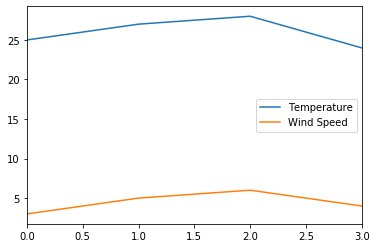

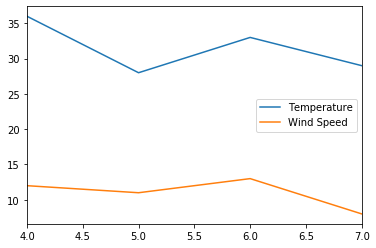

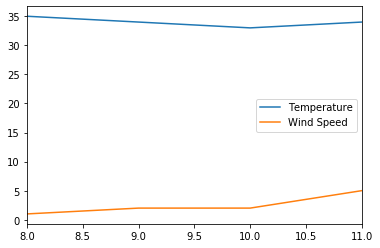

In [225]:
group_city.plot()